Ejercicio de aprendizaje no supervisado

In [94]:
#Cargar las librerías necesarias
import pandas as pd # Manejo y análisis de estructura de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
# Librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.preprocessing import StandardScaler #Estandarización de dat
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings("ignore")

In [96]:
# Lectura de datos en python y lo cargamos en la variable Datos
data = pd.read_csv("D:/Universidad/ANALISIS DE DATOS/Mall_Customers.csv")

In [98]:
#Realizmos lectura de los Datos para el analisis exploratorio

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [100]:
data.shape # verificar los registros filas x columnas

(200, 5)

In [102]:
print(data.isnull().sum()) #Verificar valores nulos

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


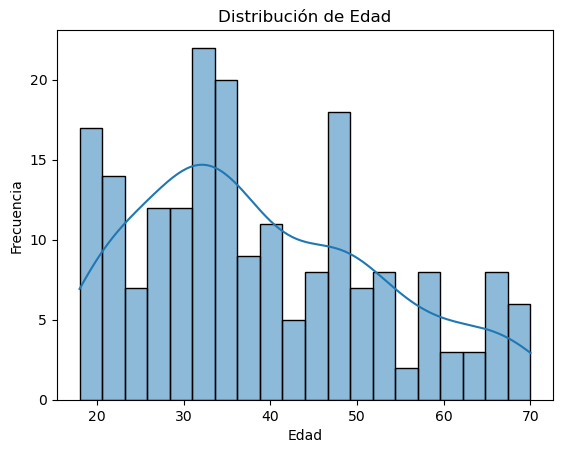

In [104]:
# Histograma de Edad
sns.histplot(data["Age"], kde=True, bins=20)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

La gráfica muestra que la mayoría de las edades están alrededor de los 30 años,
con una frecuencia decreciente conforme aumenta la edad.

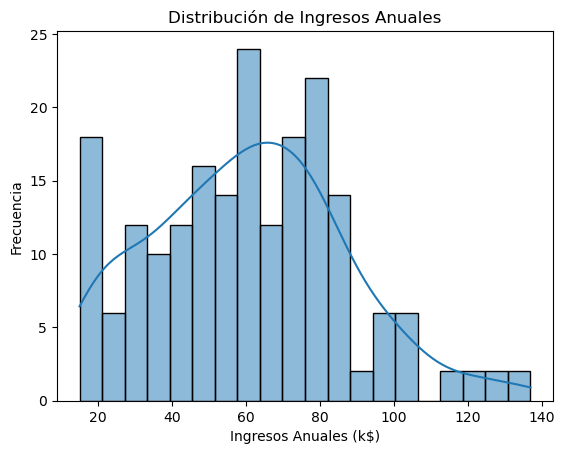

In [107]:
# Histograma de Ingresos Anuales
sns.histplot(data['Annual Income (k$)'], kde=True, bins=20)
plt.title("Distribución de Ingresos Anuales")
plt.xlabel("Ingresos Anuales (k$)")
plt.ylabel("Frecuencia")
plt.show()

El histograma muestra la distribución de los ingresos anuales. Podemos observar que la mayoría de los clientes tienen ingresos anuales
alrededor de los 60k, con una densidad decreciente a medida que los ingresos superan los 80k.

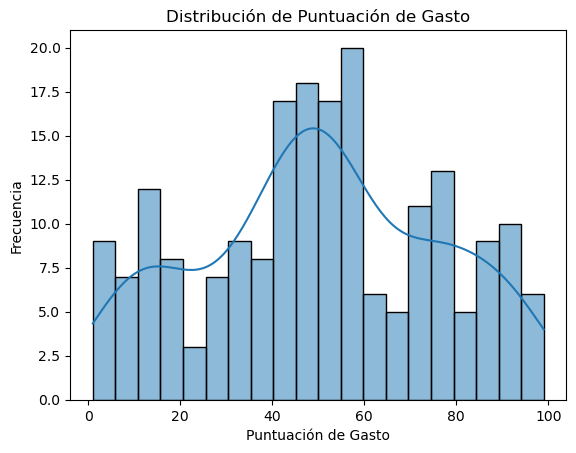

In [110]:
# Histograma de Puntuación de Gasto
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=20)
plt.title("Distribución de Puntuación de Gasto")
plt.xlabel("Puntuación de Gasto")
plt.ylabel("Frecuencia")
plt.show()

Este histograma representa la distribución de la puntuación de gasto de los clientes. 
Podemos observar que los valores están bastante dispersos, pero hay concentraciones notables en ciertos rangos, 
lo que indica un comportamiento variado en los hábitos de gasto de los clientes.


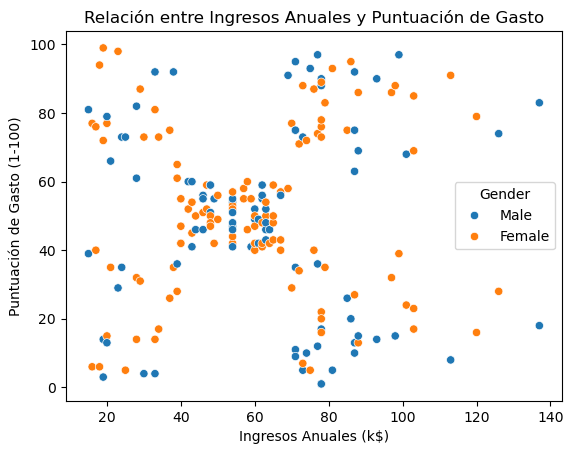

In [113]:
# Relación entre ingresos anuales y puntuación de gasto
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title("Relación entre Ingresos Anuales y Puntuación de Gasto")
plt.xlabel("Ingresos Anuales (k$)")
plt.ylabel("Puntuación de Gasto (1-100)")
plt.show()


De esta grafica podemos deducir que en la zona intermedia los clientes tienen ingresos anuales y puntación de gastos más equilibrados.

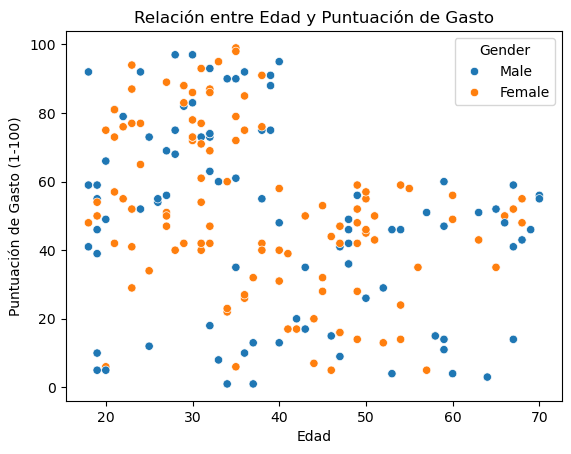

In [116]:
# Relación entre edad y puntuación de gasto
sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.title("Relación entre Edad y Puntuación de Gasto")
plt.xlabel("Edad")
plt.ylabel("Puntuación de Gasto (1-100)")
plt.show()

De la siguiente grafica podemos deducir que los clientes más jovenes tienden a tener mayor puntuación de gastos. 

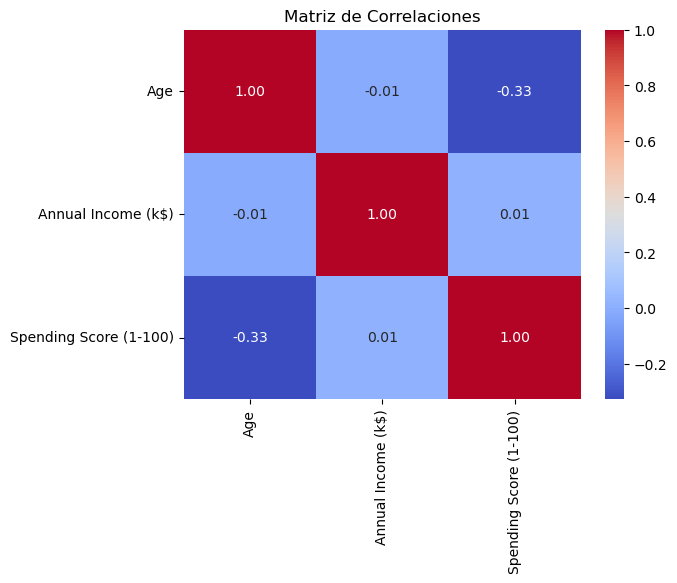

In [119]:
# Calcular matriz de correlaciones
correlation_matrix = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].corr()

# Visualización de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()

En la siguiente grafica podemos observar lo siguiente: 
*Correlación de -0.33 entre edad y punto de gastos. Esto indica una correlación negativa moderada, lo que significa 
que los clientes más jóvenes tienden a tener puntuaciones de gasto más altas, mientras que los clientes mayores tienden a gastar menos.

*Correlación de 0.01 entre los ingresos anuales y la puntuación de gastos cercana a cero, indica que los ingresos no parecen determinar directamente los hábitos de gasto.

*Correlación de -0.01 entre la edad y los ingresos anuales cercana a cero, lo que implica que no hay una relación aparente entre la edad y los ingresos anuales de los clientes.



In [122]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las variables numéricas
caracteristicas = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# Aplicamos StandardScaler para que todos nuestros datos queden uniformes. 
scaler = StandardScaler()
X = scaler.fit_transform(data[caracteristicas])

# Convertimos nuevamente a DataFrame para mejor comprensión
X = pd.DataFrame(X, columns=caracteristicas)

# Mostrar las primeras filas de los datos estandarizados
print(X.head())

        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


##K-MEANS

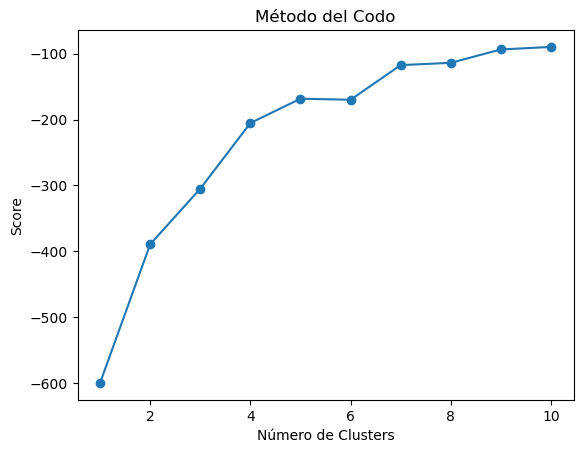

In [125]:
NC = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in NC]
kmeans
score = [kmeans[i].fit(X).score (X) for i in range(len(kmeans))]
score
plt.plot(NC,score,marker="o")
plt.xlabel("Número de Clusters")
plt.ylabel("Score")
plt.title("Método del Codo")
plt.show()

Este grafico nos ayuda a identificar el número optimo de cluster, por lo tanto,
podemos observar que alrededor de los 4 cluster la pendiente de la curva se comienza a estabilizar. De lo cual podemos deducir 
que al agregar más cluster podriamos provocar una sobre-segmentación. 


In [128]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[ 0.35087671, -1.30419961, -1.1251501 ],
       [ 1.20484056, -0.23577338, -0.05236781],
       [-0.74239092,  0.03357232,  0.82455289],
       [ 0.07333084,  0.97494509, -1.19729675]])

In [130]:
#Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
#Obtenemos los centroides
C = kmeans.cluster_centers_
colores=["red", "blue", "green", "purple"]
asignar=[]
for row in labels:
    asignar.append(colores[row])

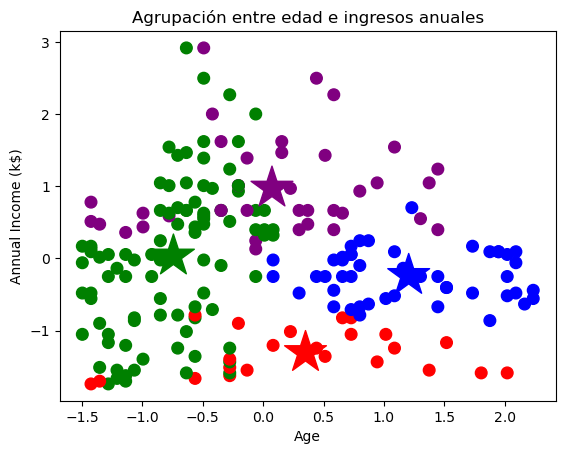

In [132]:
f1 = X["Age"].values
f2 = X["Annual Income (k$)"].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker="*", c=colores, s=1000)
plt.title("Agrupación entre edad e ingresos anuales")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

Los diferentes colores (verde, azul, púrpura y rojo) indican que los clientes están segmentados en 4 clusters distintos, 
lo cual sugiere comportamientos similares dentro de cada grupo. Las estrellas más grandes representan los centroides de cada cluster, 
que son los puntos "promedio" en términos de Edad e Ingresos Anuales para cada grupo.



In [135]:
X_new = scaler.fit_transform(np.array([[19,15,39]]))
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])
    print(new_label)
    print(color)

[2]
['green']


In [137]:
#Calcular medidas para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Indice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X,labels))
print("Inertia (suma de cuadradosdentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.3514858470238852
Indice de Calinski-Harabasz: 89.82364557433827
Inertia (suma de cuadradosdentro de los clusters): 252.64735286787533
Davies-Bouldin Index: 0.952883647876086


#Entrenamiento con 7 cluster

In [140]:
kmeans = KMeans(n_clusters=7).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[ 0.47895722, -1.30822992, -1.19644353],
       [-0.44191719,  0.99158305,  1.23950275],
       [ 0.25716397,  1.1415204 , -1.32252117],
       [ 1.86593393, -0.28283547, -0.01358755],
       [-0.95377931, -1.30081415,  1.01091344],
       [-1.06797805, -0.10367771, -0.15577151],
       [ 0.6109955 , -0.11969008, -0.10775924]])

In [142]:
#Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
#Obtenemos los centroides
C = kmeans.cluster_centers_
colores=["#EACA00", "#00FFFF", "#33FF00", "#9900FF","#30190C", "#F33A00","#D94602"]
asignar=[]
for row in labels:
    asignar.append(colores[row])

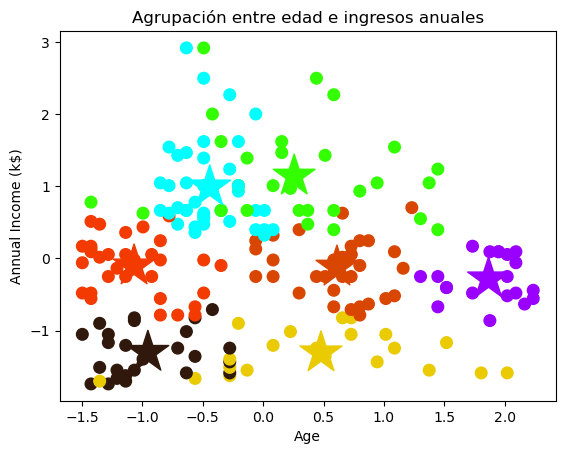

In [144]:
f1 = X["Age"].values
f2 = X["Annual Income (k$)"].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker="*", c=colores, s=1000)
plt.title("Agrupación entre edad e ingresos anuales")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

In [146]:
#Calcular medidas para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Indice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X,labels))
print("Inertia (suma de cuadradosdentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.41749371992606155
Indice de Calinski-Harabasz: 132.61321623692393
Inertia (suma de cuadradosdentro de los clusters): 117.12594802177425
Davies-Bouldin Index: 0.7943845076460679


# En el entrenamiento con 7 cluster podemos obtener los siguientes resultados:
Puntaje de silueta: 0.42% #Evalúa qué tan bien los puntos están agrupados dentro de su cluster. Lo ideal es un valor cercano a 1.

Indice de Calinski-Harabasz: 132 # Mide la relación entre la dispersión dentro de los clusters y la distancia entre ellos.Valores altos indican clusters bien definidos. 

Inertia (suma de cuadradosdentro de los clusters): 117 # Representa la suma de las distancias al cuadrado dentro de los clusters. Un valor menor indica que los puntos están más cerca de sus centroides, lo que es positivo.

Davies-Bouldin Index: 0.78 # Mide la similitud entre clusters. Valores más bajos indican una mejor separación.

# Hierarchical Clustering

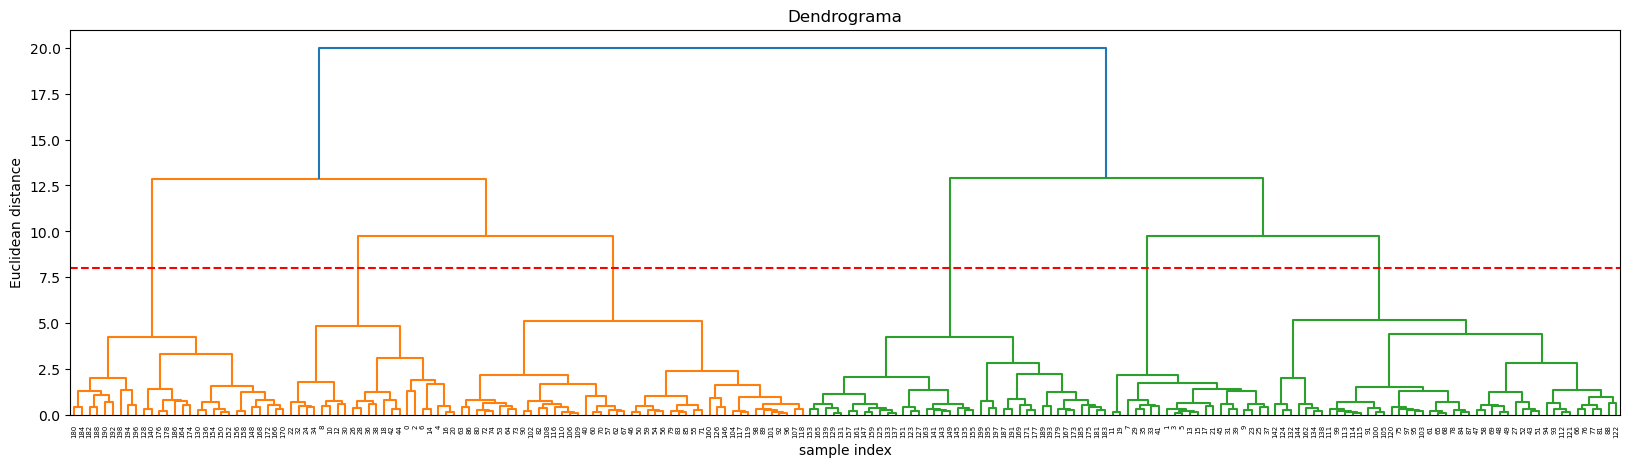

In [214]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 5))
dendrogram(ward_clustering)
plt.axhline(y = 8, color = "r", linestyle = "--")
plt.title("Dendrograma")
plt.xlabel("sample index")
plt.ylabel("Euclidean distance")
plt.show()
           

#la siguiente grafica nos muestra el umbral de corte representada por la linea roja, ubicada en una distancia eucladiana de 10 en el eje Y,
para la definicion del número final de cluster. 

#Los números de cluster están dividos en 3 grupos principales diferenciados por el color azúl, naranja y verde. Ubicados por encima del umbral de corte, 
    Los que están por debajo de la linea son la fusión de varios cluster



In [217]:
hier_clustering = AgglomerativeClustering(n_clusters=6)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int64)

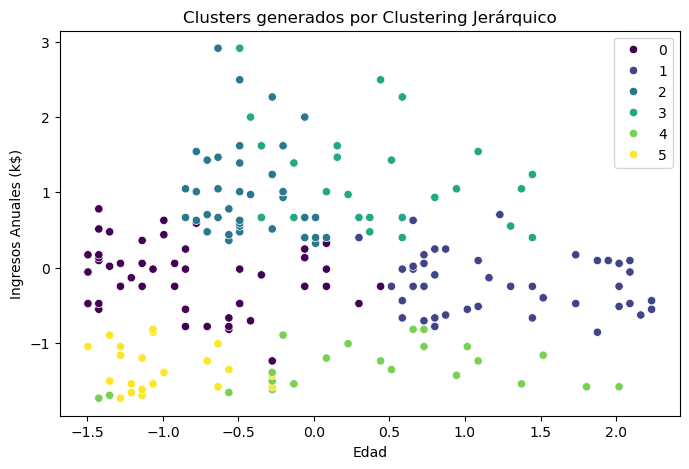

In [219]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=X, x="Age", y="Annual Income (k$)", hue=labels_hier, palette="viridis")
plt.title("Clusters generados por Clustering Jerárquico")
plt.xlabel("Edad")
plt.ylabel("Ingresos Anuales (k$)")
plt.show()

In [221]:
#Calcular medidas para Clustering Jerárquico
print("Medidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Indice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X,labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))

Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.4201169558789579
Indice de Calinski-Harabasz: 127.98645433956887
Davies-Bouldin Index: 0.8521020845733146


In [225]:
hier_clustering = AgglomerativeClustering(n_clusters=5)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int64)

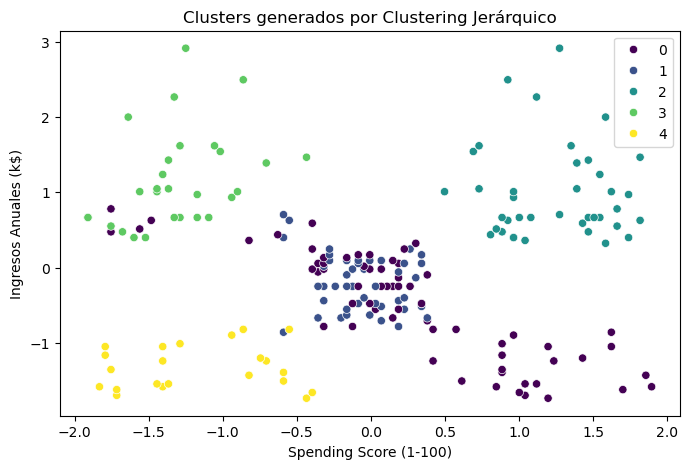

In [227]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=X, x="Spending Score (1-100)", y="Annual Income (k$)", hue=labels_hier, palette="viridis")
plt.title("Clusters generados por Clustering Jerárquico")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Ingresos Anuales (k$)")
plt.show()

In [229]:
#Calcular medidas para Clustering Jerárquico
print("Medidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Indice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X,labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))

Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.39002826186267214
Indice de Calinski-Harabasz: 107.82656032570374
Davies-Bouldin Index: 0.9162886109753661


#En comparación con los resultados entre ambas graficas podemos deducir que la primera grafica entrenada con 6 cluster es mucho mas efectiva que la segunda grafica entrenada con 5 cluster. debido a que sus puntajes son mucho mejores, por ejemplo: 

Puntaje de silueta: 0.42% #Este valor está mas cercano a 1, lo cual nos indica una buena separación de cluster. 

Indice de Calinski-Harabasz: 127. #Este valor nos indica que los cluster se encuentran bien definidos, sugiriendo que los grupos están bien diferenciados.

Davies-Bouldin Index: 0.85. #Este valor nos indica que los cluster están separados adecuadamente debido a que es un valor bajo en comparación con los resultados
de la segunda grafica. 